In [1]:
import model as m
from sklearn.linear_model import LogisticRegression

In [2]:
# we intend to test each solver independently and then compare them afterwards
clf_newton = m.Classifier(1,LogisticRegression(solver ='newton-cg'))
clf_saga = m.Classifier(1,LogisticRegression(solver ='saga'))
clf_lib = m.Classifier(1,LogisticRegression(solver ='liblinear'))
clf_sag = m.Classifier(1,LogisticRegression(solver ='sag'))

In [3]:
#stop word sets specified for this data set
path = "../data/stop_words_news_groups/"
with open(path+"stop_words_no_numbers.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_no_nums = frozenset(content)
with open(path+"stop_words_with_nums.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_with_nums = frozenset(content)


In [6]:
params_trial_1 = { 
            #penalty is l2 by default
            'vect__max_features': (1000, 10000), # we dont want features to exceed observations (because of overfitting)
            'vect__ngram_range': ((1, 1), (1, 2)),
            'tfidf__norm': ('l1','l2',None),
            'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
            'clf__max_iter': ([50,150]), #two extremes
            'clf__C':(10,1.0),
            }

In [7]:
#### TEST 1 looking at saga ####
clf_saga.fit(params_trial_1,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 14.7min finished


done in 884.707s

scores!
mean: 0.573 std: (+/-0.007) for {'clf__C': 10, 'clf__max_iter': 50, 'tfidf__norm': 'l1', 'vect__max_features': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.582 std: (+/-0.009) for {'clf__C': 10, 'clf__max_iter': 50, 'tfidf__norm': 'l1', 'vect__max_features': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.571 std: (+/-0.006) for {'clf__C': 10, 'clf__max_iter': 50, 'tfidf__norm': 'l1', 'vect__max_features': 1000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.580 std: (+/-0.009) for {'clf__C': 10, 'clf__max_iter': 50, 'tfidf__norm': 'l1', 'vect__max_features': 1000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 1}
mean: 0.706 std: (+/-0.010) for {'clf__C': 10, 'clf__max_iter': 50, 'tfidf__norm': 'l1', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.707 std: (+/-0.010) for {'clf__C': 10, 'clf__max_iter': 50, 'tfidf__norm': 'l1', 'vect__max_features': 10000, 'vect__ngr

/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[]
Evaluation on test set:

Accuracy Score : 0.6625066383430696
Precision Score : 0.6625066383430696
Recall Score : 0.6625066383430696
F1 Score : 0.6625066383430696
Confusion Matrix
[[150   2   2   1   1   0   3  13   7   3   2   1   5  10  11  47   8   8
    9  36]
 [  2 268  22  11   7  23   9  10   1   6   0   5   9   3  10   1   1   1
    0   0]
 [  2  24 239  37  17  11   2  19   2   1   1   5   3   9   9   2   1   3
    3   4]
 [  0  20  34 244  25   8  17   9   1   2   2   1  27   0   1   0   0   1
    0   0]
 [  2  11  10  30 252   3  15  19   4   2   1   3  23   4   3   0   1   1
    0   1]
 [  0  43  35  13   1 269   3  13   3   2   0   4   5   1   0   0   2   1
    0   0]
 [  1   2   5  23  16   0 296  18   5   0   1   1   8   2   4   2   2   1
    1   2]
 [  4   2   4   1   4   2  11 294  23   4   1   0  19   3   5   1   2   5
    8   3]
 [  4   2   1   2   1   1   5  49 282   4   1   0  12   5   8   1   4   1
   10   5]
 [  1   3   0   1   0   1   6  25   5 302  24   0   3

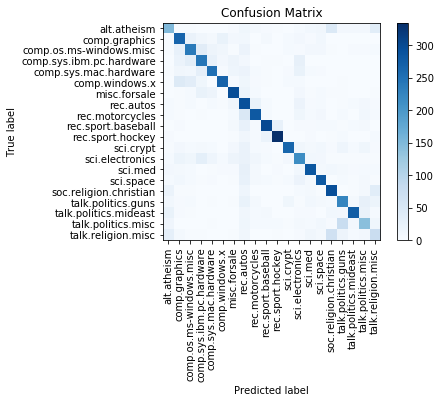

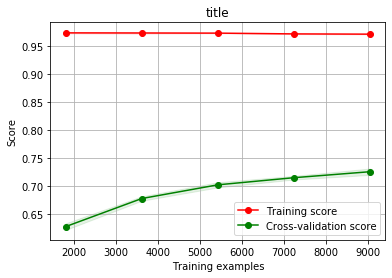

In [8]:
clf_saga.eval_on_test([],False)
clf_saga.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [69]:
        means = clf_saga.clf.cv_results_['mean_test_score']
        stds = clf_saga.clf.cv_results_['std_test_score']
        params = clf_saga.clf.cv_results_['params']
        score_dict = {}
        i=0
        for mean, std, param in zip(means, stds, params):
            #print("mean: %0.3f std: (+/-%0.03f) for %r"
                #% (mean, std * 2, param))
            i+=1
            score_dict[(mean,i)]=param #the i exists to avoid collsions
        scores = sorted(score_dict.keys(),key=lambda tup: tup[0])
        scores = scores[int(0.8*len(scores)):]
        p = score_dict[scores[0]]
        param_occurence = []#will be an array of dicts -> each index represnt a param (i.e alpha)
        j=0
        print(len(scores))
        for k in p.keys(): 
            #each k is a key to a the specific hyper -param and (i.e k:alpha)
            # we then iterate through our top params dictionary to update occurence of certain param
            #print("NEW J "+str(j))
            param_occurence.append({})
            #print(k)
            for s in scores:
                #for the given score s gives us the hyper param type giving us the selected value (i.e s -> alpha -> 0.001)
                val = score_dict[s][k]
                #print(val)
                #print(param_occurence[j])
                if param_occurence[j].get(val):
                    param_occurence[j][val]+=1
                else: param_occurence[j][val]=1
            j+=1
        param_occurence        
            

20


[{10: 12, 1.0: 8},
 {150: 10, 50: 10},
 {'l1': 4, 'l2': 16},
 {10000: 20},
 {(1, 1): 12, (1, 2): 8},
 {0: 10, 1: 10}]